## Introduction
This is a case study completed as a capstone project to the Google Data Analytics Certificate. The data used for this case study is first party data collected by Lyft Bike's and Scooters, LLC ("Bikeshare") and the City of Chicago's ("Divvy") bike sharing service. This data owned by the City is made available to the public under this [license](https://ride.divvybikes.com/data-license-agreement). 

For the purposes of this case study, the data is being considered as data collected by Cyclistic, a fictional bike-share company in Chicago.


## Background

In this case study, I am a Jr. Data Analyst at Cyclistic, a bike-share company based in Chicago. Cyclistic offers over A bike-share program that features more than 5,800 bicycles and 600 docking stations in Chicago. Cyclistic has two customer segments: Casuals and Members. Casuals are customers who either buy a single-trip pass or a day pass, and Members are classified as customers that buy annual memberships.

The marketing team  believes there is a very good chance to convert casual riders into members and want to design marketing strategies around this. I have been assigned the question: How do annual members and casual riders use Cyclistic bikes differently? by my manager, the director of marketing.

I will produce a report with the following deliverables:

1. A clear statement of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top three recommendations based on your analysis


## Ask

This is the business Task: Discover how annual members and casual riders use Cyclistic bikes differently to inform marketing strategies aimed at converting casual riders to annual members.



## Prepare

I'm using all the data for 12 months (Nov 1 2021-Oct 31 2022). I will be using the CSV files in public dataset which can be found [here](https://divvy-tripdata.s3.amazonaws.com/index.html). The data is public and made available by Motivate International Inc. under this this [license](https://ride.divvybikes.com/data-license-agreement). The privacy of the riders is safeguarded as there are no IDs so it's not possible to identify the riders.


## Process

### Part 1

I used SQL on Google’s BigQuery platform to combine and clean the data. Below is an outline of my process:

I created a dataset called tripdata_2021_to_2022 and imported the 12 CSV files as 12 separate monthly tables in the dataset. I then combined all 12 monthly tables into one table containing all bike trip data from NOV 2021 to OCt 2022.

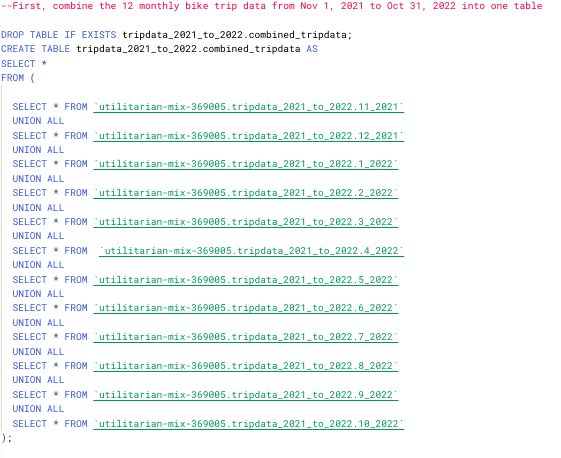

The combined table contains 4,517,370 rows and has 13 columns/fields. Below is the name of each column and its data type:

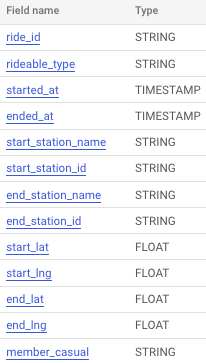

I explored the data from the combined table by running queries on each column and making notes of data to be cleaned. Part 1 of cleaning process with SQL can be viewed [here](https://console.cloud.google.com/bigquery?sq=373810022363:01ee5fde9213466192f0db73fd639b11) on BigQuery. An example of me analyzing all the columns for null values can be seen below:

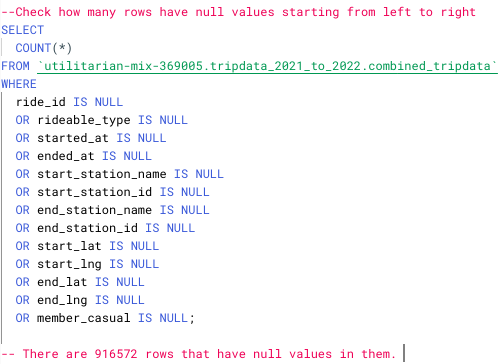

Here is a quick summary of my findings with Part 1 of the cleaning process:

* ride_id: there are no null values under this column, there are only 5 duplicate values, and the ride_id's have strings that  have 8, 9, 10, 11, 13, 14, 15, with the majority being 16 characters long. I decided to use all of the ride_ids in my analysis, though I would contact Cyclistic about the lengths of the ride_id's. Also, around 4.5 million unique bike trips took place in the time period from Nov 2021 to OCt 2022.
* rideable_type: there are no null values under this column, and the data contains 3 types of bikes: classic, docked, and electric bikes. 
* started_at/ended_at: there are no null values under this column. These columns show the date and time that the bike trips started and ended. There are 173,004 trips where the ride-time of the trip was less than 1 minute or greater than 1 day. All of these trips will be removed during the cleaning process.
* start_station_name/end_station_name: in both columns found 916,572 rows that have null values. Found some repair stations, and test charging stations that will be removed from analysis. Found start/end station names with "(Temp)", and those with a "*". I will keep start/end station names with those values, so as to not mess up any internal naming conventions Cyclistic may have, since I can't contact them in ths setting. There are 911,934 trips with null values in either the starting station name column or the ending station name, which also all happen to be electric bikes. There are 2,212,817 eletric bikes, and 911,934 of them have null start/end station names. In other words, 41.2 % would be unusable, which is a signifcant number. For the purposes of this analysis, I will include these  values, as I can't contact Cyclistic, and I don't want to skew the business question of how casuals and members use the bikes. I also looked at the null start/end station values in the classic and docked bikes. There are 3,041 calssic bike trips and 1,597 docked bike trips that have a null value in the start/end station names, which will be removed.
* start_station_id/end_station_id: there are 961,572 rows that have a null start_station_id or end_station_id, the same as the start/end station names. I decided that I will not be using the start_station_id and end_station_id columns. start_station_name and end_station_name are the most relevant to our analysis and easier to understand. I will remove the columns for the final cleaned table.
* start_lat/end_lat & start_lng/end_lng: these 4 columns show the starting and ending location of the bike trips. We will plot the locations on a map in Tableau later; thus, we will remove all 3,599 trips that have at least one null value.
* member_casual: there are no null values in this column. I checked that ‘casual’ and ‘member’ are the only allowable strings in this column.


### Part 2

Now I  know what data needs to be cleaned/removed and which columns can be created from the existing data for our analyisis. Part 2 of cleaning process with SQL can be viewed [here](https://console.cloud.google.com/bigquery?sq=373810022363:46df1a05ea1e4378955af4ebb146993e) on BigQuery. Below is an example of the first part of the query.

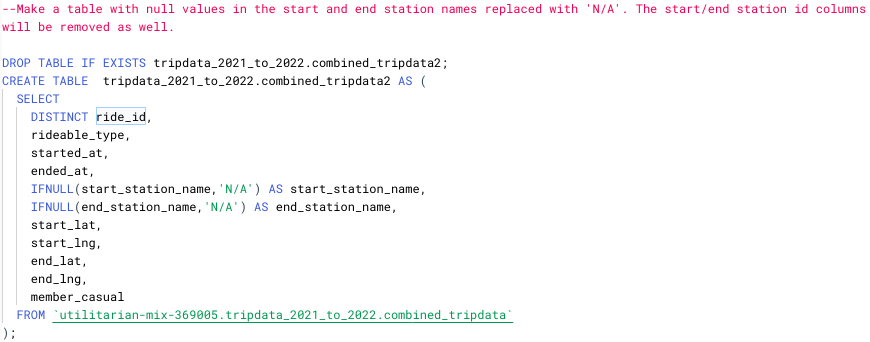

A summary of the cleaning steps I took is as follows:

* Replaced null values in the start/end station name columns with ‘N/A’ for only electric bikes.
* Removed trips where the type of bike used was a classic bike or docked bike and either the start or end station was null.
* Removed trips that had null values in the start/end latitude or longitude columns.
* Created day of the week, month, year, and ride time length columns.
* Removed trips where the ride time length was less than/equal to 1 minute or greater than/equal to 1 day.
* Removed trips that contained repair stations, and test charging stations.

In total, I removed 173,538 rows to be left with a clean combined table with 4,343,832 rows.


## Analyze & Share

Time to answer the question: How do annual members and casual riders use Cyclistic bikes differently? Time to analyze the data.

To analyze my data I used SQL in BigQuery to sort, filter, and aggregate my data before importing it into Tableau to create data visualizations. My SQL analysis queries can be viewed [here](https://console.cloud.google.com/bigquery?sq=373810022363:46df1a05ea1e4378955af4ebb146993e) starting at line 97 and all my Tableau visualizations can be found [here](https://public.tableau.com/app/profile/ike.emeche/viz/GoogleDataAnalyticsCapstoneProject_16711701880590/Top5Routes?publish=yes). An example of two of the queries can be seen below.

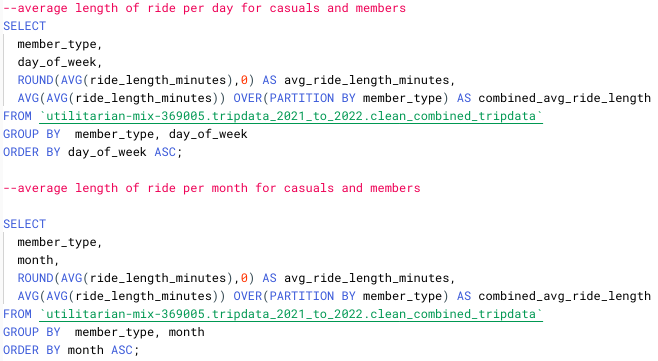

### Summary of Analysis

First I examined bike type preferences between annual members and casual riders.

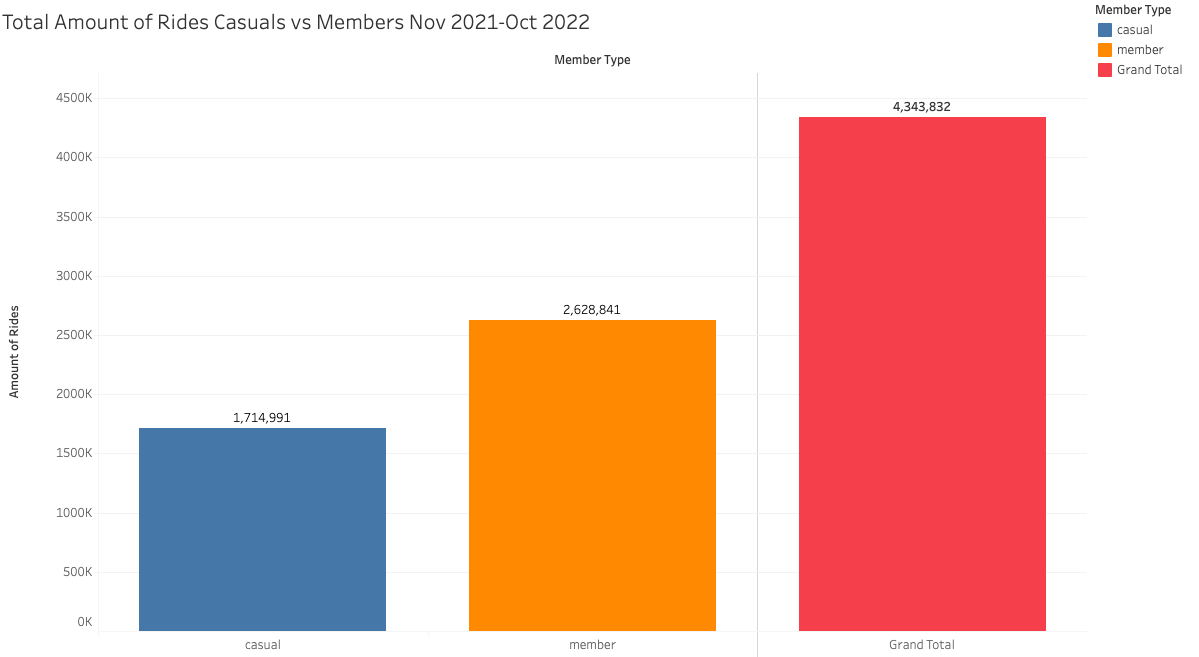

Annual members made up 60.5% of all trips during Oct 2021 to Nov 2022, and casual riders accounted for 39.5% of trips during the same time period. 

As seen below, casuals prefer electric bikes over classic and docked bikes, and members prefer classic bikes over electric and docked bikes.

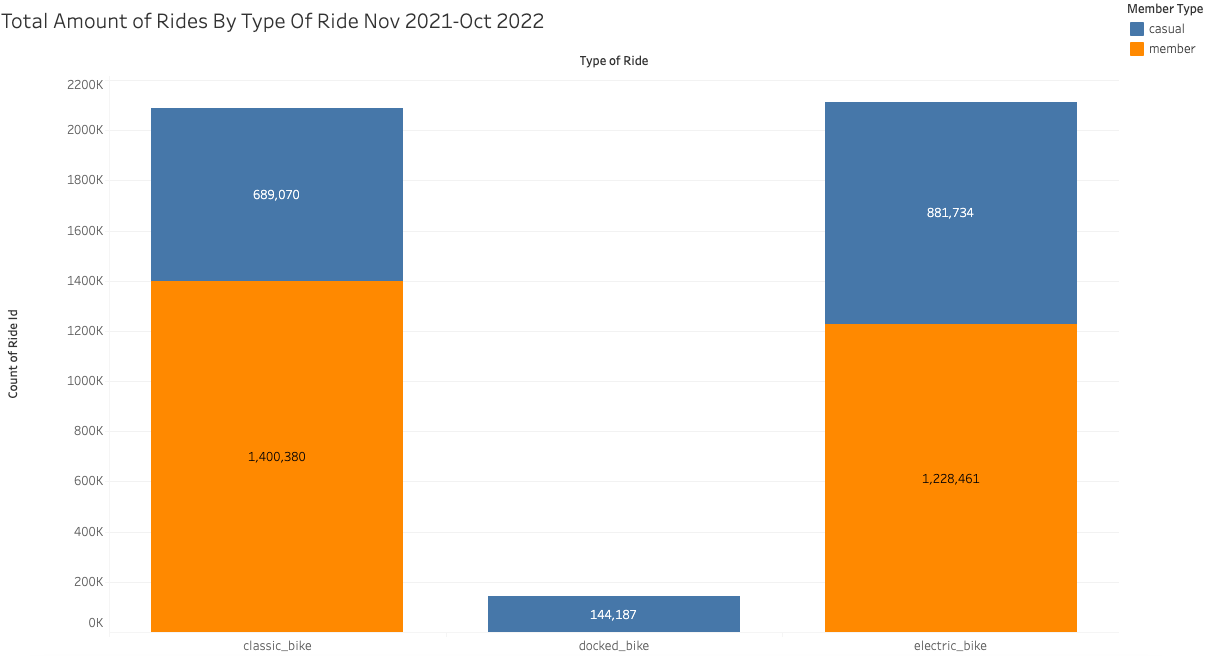

Next, I examined the total ride time in minutes by ride type during Nov 2021-Oct 2022.

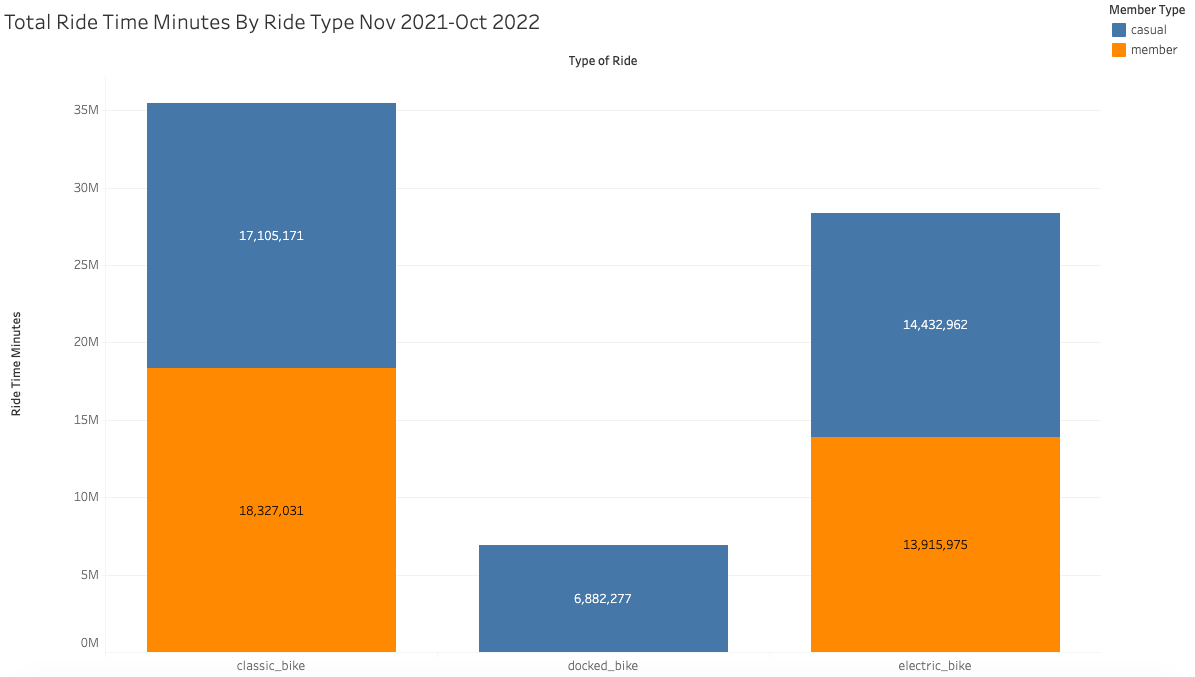

Evem though casuals and members differ from bike preference, both groups spend roughly the same amount of time riding classic and electric bike in total minutes. Docked bikes for some reason are only used by casuals

Next, I examined both the total number of bike trips taken and the average ride time minutes from Nov 2021 to Oct 2022 by month, day of week, and hours

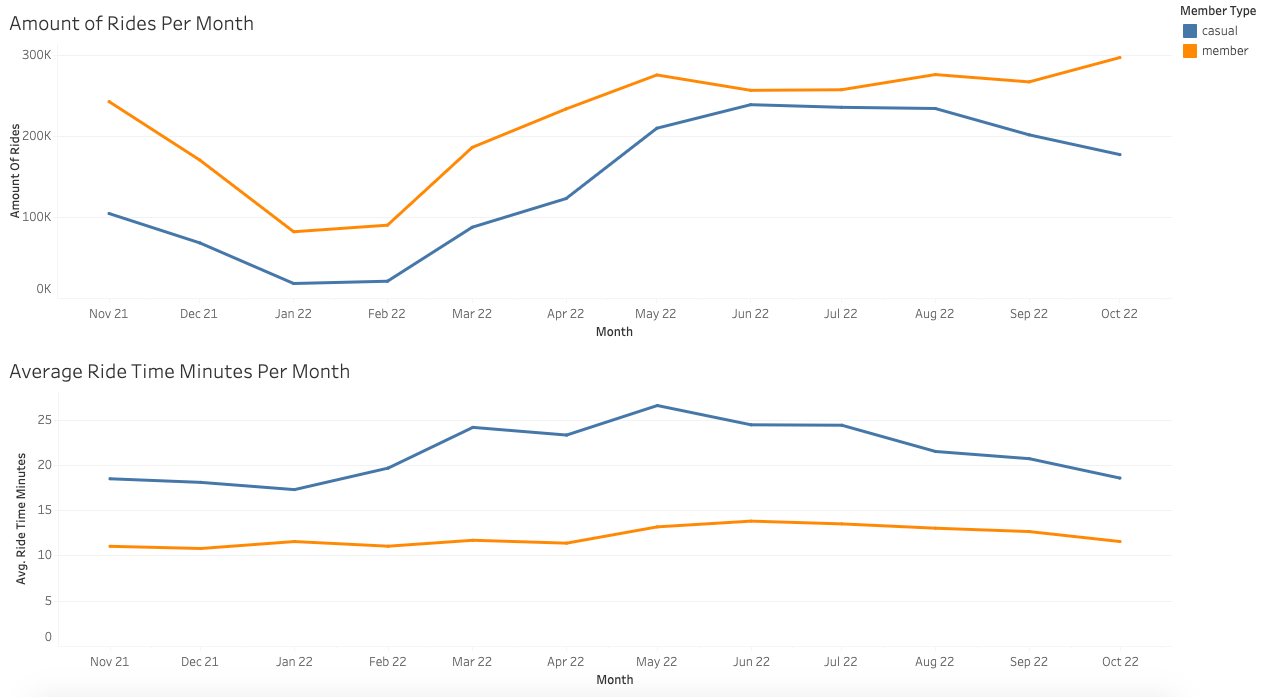

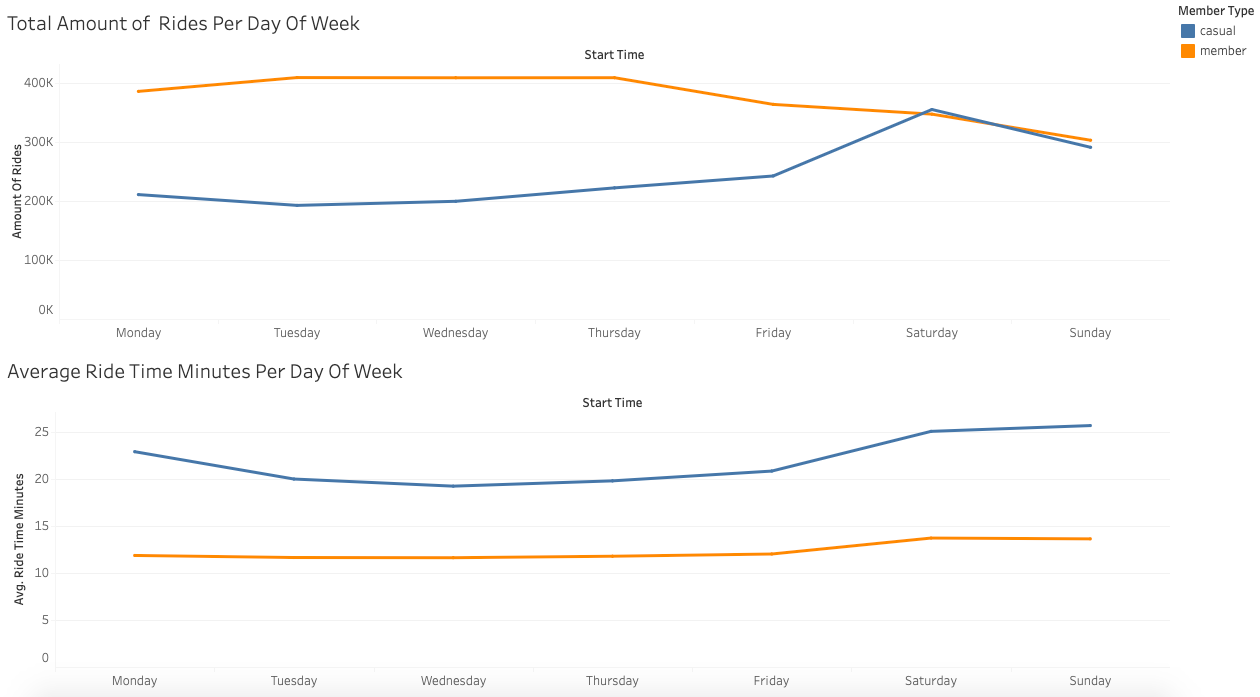

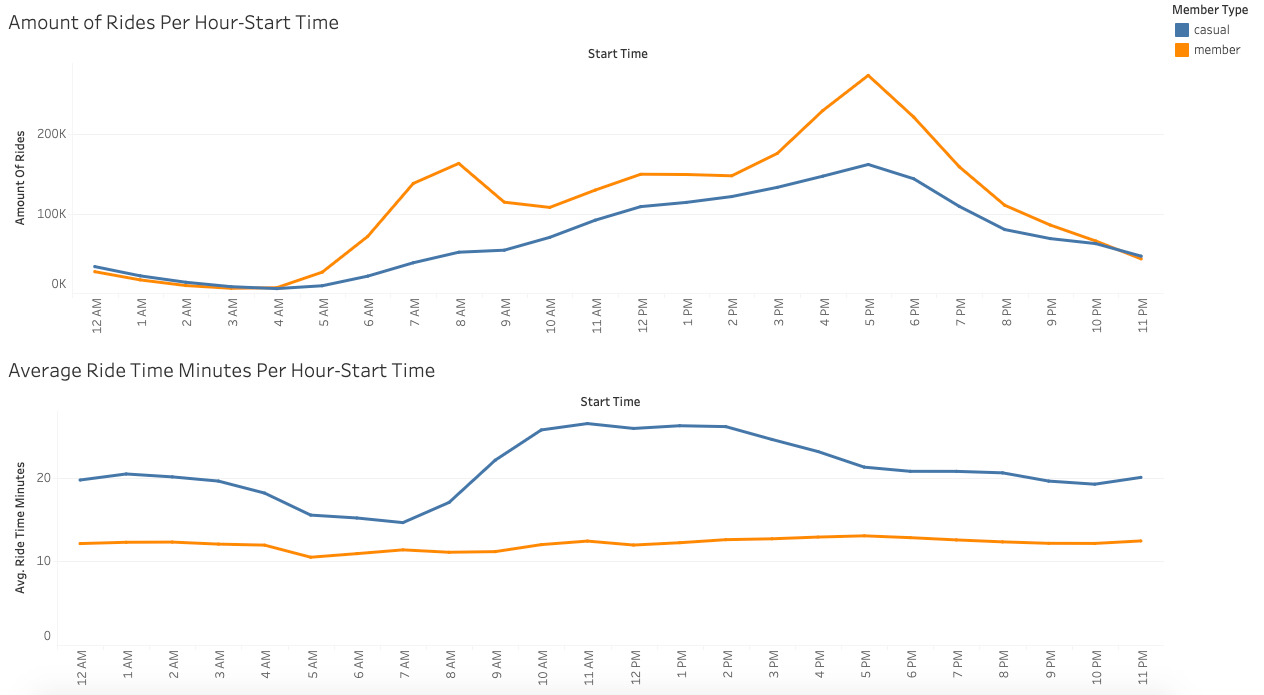

From the line graphs above, casuals and members increase their rides from January to May, when the weather turns more favorable. Members dip in biking from May to June, but then biking increases from June to October. Casuals on the other hand increase from May to June, but then slowly start to decrease in biking until August, where their numbers drop off until October. Both casuals and members don't prefer the winter months (Jan/Feb), likely due to the worse weather conditions. Also, casual members ride more from Friday into the weekend, wheras members are consistent riders up until Friday and the weekend. Annual member ridership levels rise significantly between 6am and 8am and peak between 3pm and 5pm, before dropping considerably after 7pm. Casual ridership levels are more consistent during the day with no abrupt spikes, peaking at 5pm, and trailing off after 7pm.


No matter the time frame, a pattern starts to emerge: members ride more than causals, but casuals have longer lasting strips than members. Members average time riding stays fairly consistent no matter the time frame. From the data above, it seems like annual members use Cyclistic bikes for short term purpose like work commutes and errands, since the ridership levels peak during typical commuting times for work (8am/5pm) and drop outside of typical work hours. Also, annual member ridership levels show less of a trend of dropping in the winter months when compared to casual members. Casuals might be using Cyclistic bikes for longer distances, and leisure time.


Before making the visualizations of the map of Chicago with the start/end station names, I wanted to see what routes were the most popular between the casuals and members. I classified a route as one start station to one end station. The top 5 routes and the frequencies are shown below:

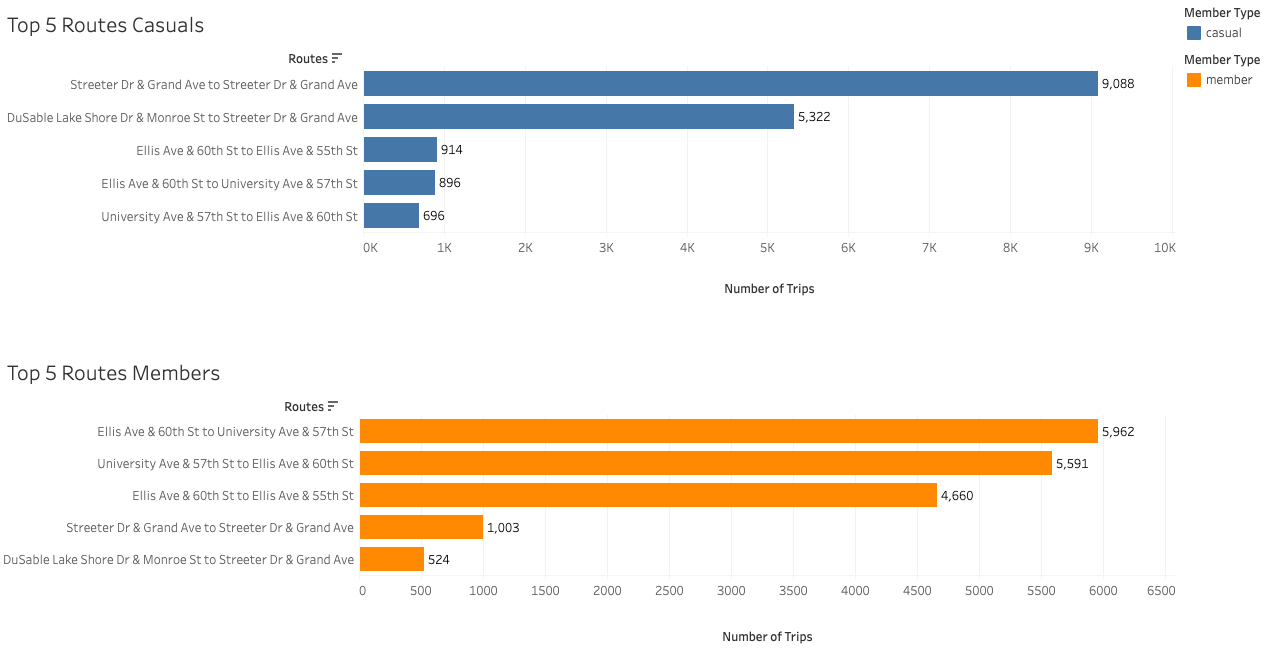

Routes for both groups will be important to note, with Streeter Dr & Grand Ave to Streeter Dr & Grand Ave being of note. The question of where that location is will help with the analysis, as well as routes for the members. 

Next, I used Tableau to get a visual idea of where riders were using bikes most. Below is a map of Chicago with the starting locations of the bike trips plotted. The bike trips are grouped by member type and exclude electric bike trips where the start station name was "N/A" due to it having null values. I also filtered the map to only show the top 10 locations with the largest frequencies of starting trips per member type.

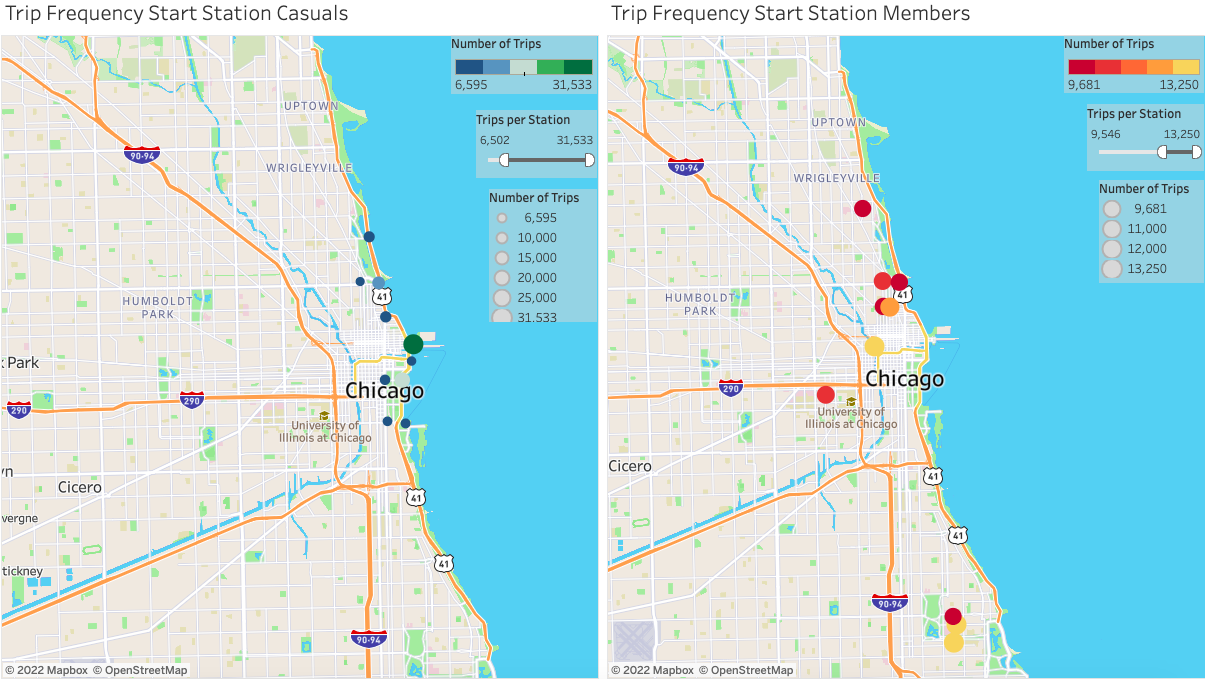

The 10 most popular starting stations for casual members are generally near the water, big parks, and tourist spots (Shedd Aquarium) In contrast, annual members usually start their trips more inland, near office buildings, apartment buildings, and college campuses.

Now for the top 10 ending locations, excluding trip with electric bikes that did not have an end station name (those were marked instead with "N/A").

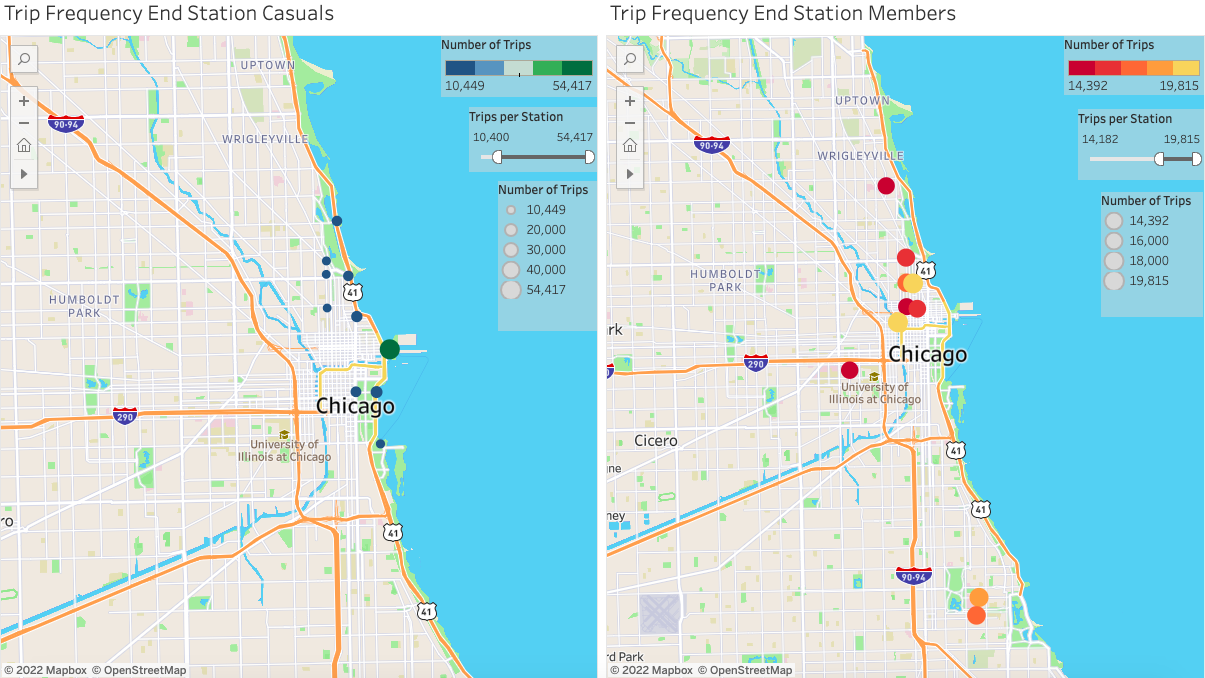

The map above shows similar trends of casual riders around areas near parks and the water/pier and annual members around commercial areas. Casual riders’ top 5 most visited stations are mostly the same for both starting and ending stations (with the exception of Millenium Park and Theater on the Lake). These include Streeter Dr & Grand Ave (the pier), which was also the most frequent route as well on the top 5 routes visualization. Those aforementioned start and end stations are all very big tourist attractions and recreational areas. The analysis shows that none of the casuals start/end stations are in the top 5 most visited for members, leading towards the inlcination that recreation and sightseeing are not what members tend to use Cyclistic for.



## Act

### Conclusion of Insights

#### Casual Riders:

* Tend to start and end their trips near the water, city parks, and other tourist/recreational attractions.
* Are active mostly during Spring and Summer.
* The number of rides and average ride time indicates that they don't ride a lot, but when they do they spend a high amount of time.
* They tend to have most of the rides during the end of the week.
* Their top routes hint that they use the bike almost only for a recreational purpose.

#### Members

* Tend to use the Cyclistic bikes for short range travel like commuting/errands; preferring to ride all-year-round on the weekdays, dropping off in the winter months, and during peak work commuting times (8am/5pm).
* Are active through all the year with peaks in Spring and Summer
* The number of rides and average ride time suggest that they do frequent trips of short distance.
* They tend to have most of the rides during the week in Winter and Autumn and on the weekends in Spring and Summer.
* Their top routes hint that they use the bike most likely for work or studying purposes throughout the year.

### Recommendations

Now that I have shown the differences between casual riders and annual members, the marketing department can start to develop its strategy of converting casual members to annual members. 
* The marketing team should consider consider initiating a monthly or weekly pass since casual riders might not want to be forced to get an annual subscription, since they are mostly using it for their own leisure. The monthly pass could encourage more casual users to become members over time, since it would be wise to price the monthly pass so that 12 individual months is more than an annual pass, like models you see in subscription services today. A weekend pass also could work here too.
* Since casual riders tend to ride the most towards the end of the week, they could be offered a membership for  weekends. Since they seem to enjoy leisure trips they could be offered an "entry-level" membership that is packaged with all of the sightseeing options, parks, etc. 
* Most of the casual riders use the service from Spring to the end of the Summer, I would use that time frame for the marketing campaign. I would market to casuals by using paid advertisements in the most popular start stations that are marked on the map, and as well as the top 5 routes for casuals as well. Market the membership in summer and on weekends when casual riders use the service most and introduce a promotional annual membership deal.
* Late fees for full day passes could be introduced since when the data was being cleaned, there were 173,004 trips that had to be removed for analysis due to time being more than 24 hours/ less than 1 minute. Capping the length of time a person can rent a bike with a single-ride pass could also help convert casual riders to members. A good number of riders are using the service less often but for longer amounts of time. 

Some issues I found with the data is after doing the analysis, I am still not sure about what exactly "docked" bikes are. Especially since only casual members are using them. It seems strange that only that group uses those bikes. Another issue is that the data doesn't tell us what portion of the casual riders are just tourists visiting Chicago. If that is the case, it would be very difficult to turn these casuals into members.
